In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

In [2]:
time_to_maturity = np.array(
    [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])

zero_coupon_yields = np.array(
    [1.80, 1.90, 2.05, 2.10, 2.20, 2.50, 2.80, 2.90, 3.10, 3.40])

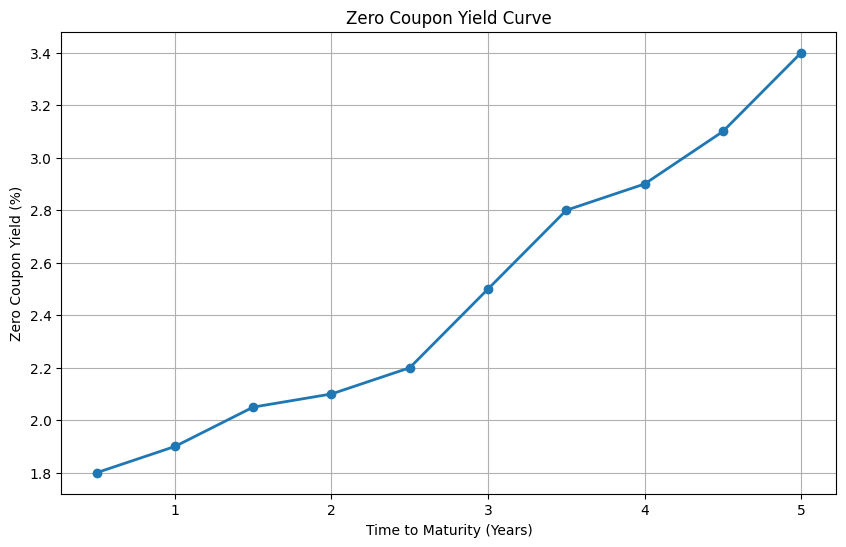

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(time_to_maturity, zero_coupon_yields, marker='o', linestyle='-', linewidth=2)
plt.title('Zero Coupon Yield Curve')
plt.xlabel('Time to Maturity (Years)')
plt.ylabel('Zero Coupon Yield (%)')
plt.grid(True)
plt.show()

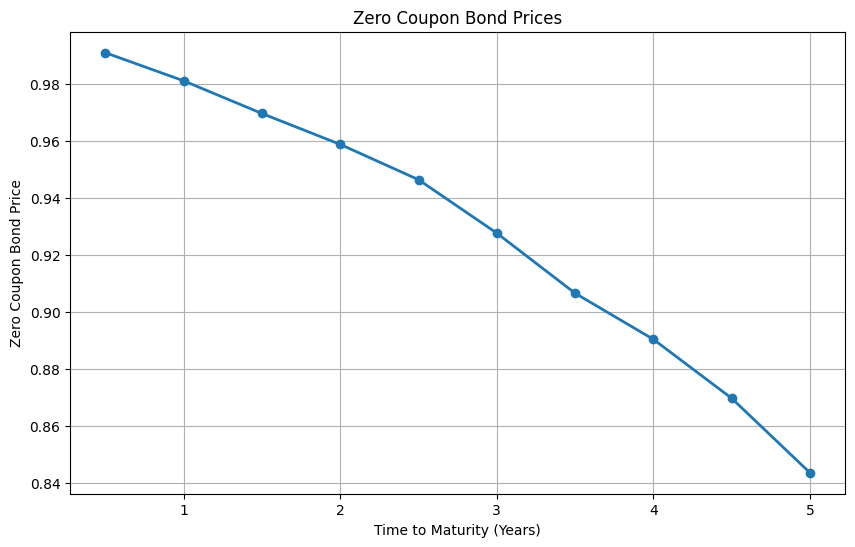

In [9]:
## Compute zero coupon bond prices with continuous compounding
def zero_coupon_price(yield_rate, time_to_maturity):
    return np.exp(-yield_rate * time_to_maturity)

zero_coupon_prices = zero_coupon_price(zero_coupon_yields / 100, time_to_maturity)

plt.figure(figsize=(10, 6))
plt.plot(time_to_maturity, zero_coupon_prices, marker='o', linestyle='-', linewidth=2)
plt.title('Zero Coupon Bond Prices')
plt.xlabel('Time to Maturity (Years)')
plt.ylabel('Zero Coupon Bond Price')
plt.grid(True)
plt.show()



### Forward Rates from Zero-Coupon Yields and Bond Prices

The forward rate $f(0, t_1, t_2)$ between two maturities $t_1$ and $t_2$ can be calculated using two methods:

1. **From Zero-Coupon Yields**:
   $$
   f(0, t_1, t_2) \approx \frac{y(0, t_2) \cdot t_2 - y(0, t_1) \cdot t_1}{t_2 - t_1}
   $$
   Where:
   - $y(0, t_1)$ and $y(0, t_2)$ are the zero-coupon yields for maturities $t_1$ and $t_2$, respectively.

In [23]:
# Compute forward rates from zero coupon yields vector and time to maturity vector using vectorized operations with numpy.array
def calculate_forward_rates_from_yield(zero_coupon_yields, time_to_maturity):
    
    y2 = zero_coupon_yields[1:]   # Takes all yields except the first one
    y1 = zero_coupon_yields[:-1]  # Takes all yields except the last one
    t2 = time_to_maturity[1:]     # Takes all times except the first one
    t1 = time_to_maturity[:-1]    # Takes all times except the last one
        
    # Compute forward rates using the formula
    forward_rates = (y2 * t2 - y1 * t1) / (t2 - t1)
    
    return forward_rates

forward_rates_from_yield = calculate_forward_rates_from_yield(zero_coupon_yields / 100, time_to_maturity)


**From Zero-Coupon Bond Prices**:
   $$
   f(0, t_1, t_2) = -\frac{\ln P(0, t_2) - \ln P(0, t_1)}{t_2 - t_1}
   $$
   Where:
   - $P(0, t_1)$ and $P(0, t_2)$ are the zero-coupon bond prices for maturities $t_1$ and $t_2$.


In [27]:
def calculate_forward_rates_from_prices(zero_coupon_prices,time_to_maturity):
    
    p2 = np.log(zero_coupon_prices[1:])
    p1 = np.log(zero_coupon_prices[:-1])
    t2 = time_to_maturity[1:]
    t1 = time_to_maturity[:-1]

    forward_rates = -(p2 - p1)/(t2 - t1)

    return forward_rates

forward_rates_from_prices = calculate_forward_rates_from_prices(zero_coupon_prices,time_to_maturity)

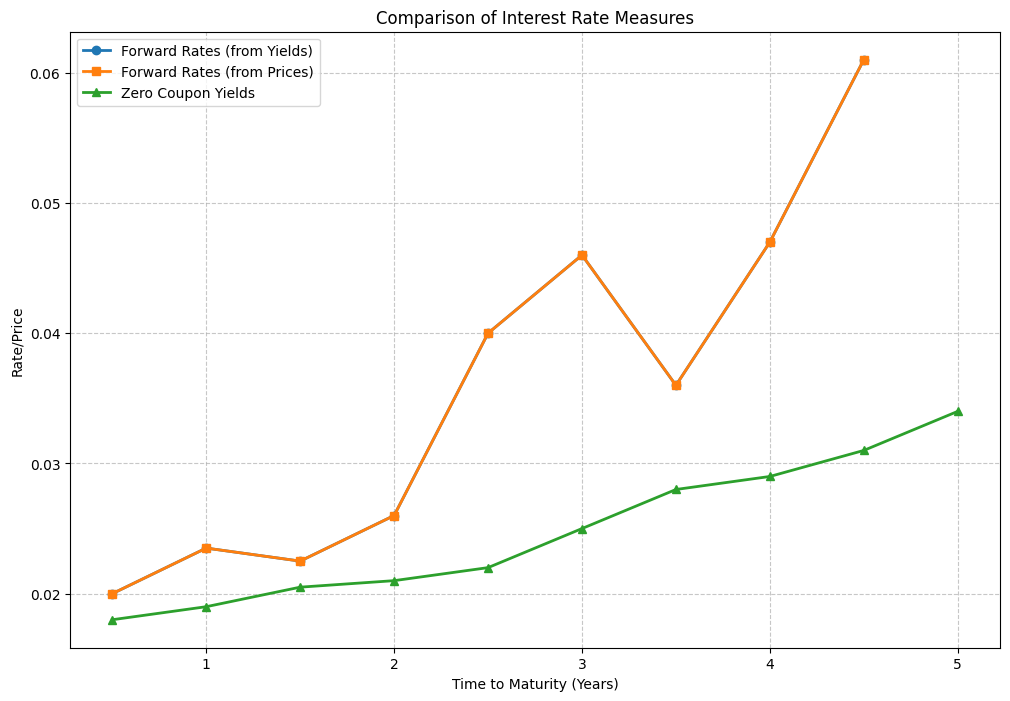

In [ ]:
# Create a new figure with the specified size
plt.figure(figsize=(12, 8))

# Plot all measures
plt.plot(time_to_maturity[:-1], forward_rates_from_yield, 
         marker='o', label='Forward Rates (from Yields)', linewidth=2)
plt.plot(time_to_maturity[:-1], forward_rates_from_prices, 
         marker='s', label='Forward Rates (from Prices)', linewidth=2)
plt.plot(time_to_maturity, zero_coupon_yields/100, 
         marker='^', label='Zero Coupon Yields', linewidth=2)

# Customize the plot
plt.title('Comparison of Interest Rate Measures', fontsize=12)
plt.xlabel('Time to Maturity (Years)', fontsize=10)
plt.ylabel('Rate/Price', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)

# Show the plot
plt.show()